In [24]:
import pandas as pd
import os
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14
os.chdir('/Users/michaeltwardos/Desktop/') #PLEASE SET THIS WORKING DIRECTORY TO YOURS
data = pd.read_csv('Asana Users.csv')
data.head()

,user_id,mailing_list,drip,invited,guest_invite,personal_projects,first_seven,any_seven
0,1,1,0,1,1,0,0,0
1,2,0,0,1,0,0,0,1
2,3,0,0,1,0,0,0,0
3,4,0,0,1,1,0,0,0
4,5,0,0,1,1,0,0,0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)

1    0
2    0
3    0
4    0
Name: mailing_list, dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['mailing_list']
X = data[feature_cols]
y = data.any_seven
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
linregFirst = LinearRegression()
feature_cols = ['mailing_list']
X = data[feature_cols]
y = data.first_seven
linregFirst.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
data['any_pred'] = linreg.predict(X)
data['first_pred'] = linregFirst.predict(X)
data.head(10)
#How do we get the most predictive inputs from these models?
#How do we measure correlation between each column and each signal?

,user_id,mailing_list,drip,invited,guest_invite,personal_projects,first_seven,any_seven,any_pred,first_pred
0,1,1,0,1,1,0,0,0,0.138277,0.014696
1,2,0,0,1,0,0,0,1,0.131912,0.010882
2,3,0,0,1,0,0,0,0,0.131912,0.010882
3,4,0,0,1,1,0,0,0,0.131912,0.010882
4,5,0,0,1,1,0,0,0,0.131912,0.010882
5,6,0,0,1,1,0,0,0,0.131912,0.010882
6,7,0,1,0,0,0,0,0,0.131912,0.010882
7,8,1,1,0,0,1,0,0,0.138277,0.014696
8,9,0,0,0,0,1,0,0,0.131912,0.010882
9,10,1,1,1,0,0,0,1,0.138277,0.014696


In [15]:
#Computes fraction of the list that has the val.
def prob(lst, val):
    L = len(lst)
    if L > 0:
        p = round(float(len(lst[lst==val]))/L, 3)
    else:
        p = 0
    return p

#Determines the Entropy Contribution from a given probability
def entropyContribution(p):
    if p != 0:
        return round(-p*math.log(p, 2), 3)
    else:
        return 0
    
#Computes the entropy given a binary probability - 1 or 0
def binaryEntropy(p):
    S = entropyContribution(p) + entropyContribution(1-p)
    return S

In [16]:
prob(data.mailing_list, 1)

0.249

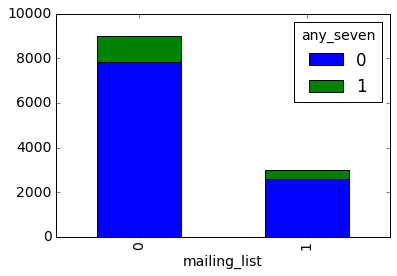

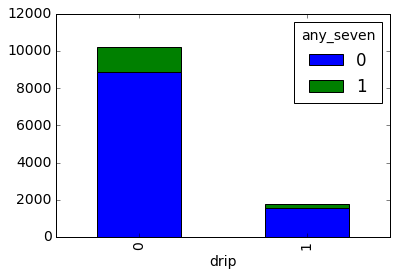

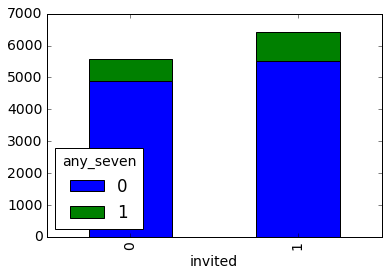

In [21]:
[data.groupby(['mailing_list', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True),
 data.groupby(['drip', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True),
 data.groupby(['invited', 'any_seven'])['any_seven'].count().\
 unstack('any_seven').plot(kind='bar', stacked=True)]

In [31]:
print binaryEntropy(prob(data.any_seven, 1))

0.569


In [30]:
#Compute the Absolute Conditional Entropy from using a
print 'mailing_list'
print prob(data.mailing_list, 1)*binaryEntropy(prob(data[data.mailing_list==1].any_seven, 1)) + \
      prob(data.mailing_list, 0)*binaryEntropy(prob(data[data.mailing_list==0].any_seven, 1))

print 'drip'
print prob(data.drip, 1)*binaryEntropy(prob(data[data.drip==1].any_seven, 1)) + \
      prob(data.drip, 0)*binaryEntropy(prob(data[data.drip==0].any_seven, 1))

print 'invited'
print prob(data.invited, 1)*binaryEntropy(prob(data[data.invited==1].any_seven, 1)) + \
      prob(data.invited, 0)*binaryEntropy(prob(data[data.invited==0].any_seven, 1))

print 'guest_invite'
print prob(data.guest_invite, 1)*binaryEntropy(prob(data[data.guest_invite==1].any_seven, 1)) + \
      prob(data.guest_invite, 0)*binaryEntropy(prob(data[data.guest_invite==0].any_seven, 1))

print 'personal_projects'
print prob(data.personal_projects, 1)*binaryEntropy(prob(data[data.personal_projects==1].any_seven, 1)) + \
      prob(data.personal_projects, 0)*binaryEntropy(prob(data[data.personal_projects==0].any_seven, 1))

mailing_list
0.566421
drip
0.56749
invited
0.56582
guest_invite
0.56518
personal_projects
0.561448


In [26]:
data.columns

Index([u'user_id', u'mailing_list', u'drip', u'invited', u'guest_invite',
       u'personal_projects', u'first_seven', u'any_seven'],
      dtype='object')